# HW2

Неснижаемая остаточная водонасыщенность: $ S_{wr} = 0.421 $;

Плотность нефти: $ \rho_{o} = 750 \frac{kg}{m ^ 3} $;

Плотность воды: $ \rho_{w} = 1050 \frac{kg}{m ^ 3} $;

Капилярное давление задано функцией от водонасыщенности $S_{w}$: 
$ P_{cap}(S_{w}) = \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} )} $ (1)

### Пункт 1

Капилярное давление также выражается формулой: 

$P_{cap}(S_{w}) = \int_{0}^{H} (\rho_{w} - \rho_{o}) \cdot g \cdot d\widetilde{h}$ (2);

Посчитаем этот интеграл: 

$ \int_{0}^{H} (\rho_{w} - \rho_{o}) \cdot g \cdot d\widetilde{h} = (\rho_{w} - \rho_{o})gH$ (3);

Приравняем два выражения для капилярного давления:

$ \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} )} = (\rho_{w} - \rho_{o})gH$ (4);

Подставим исходные данные в это выражение и посчитаем высоту $H$, для которой будет достигнуто значени $S_{w} = 0.421$.

In [1]:
oil_density = 750
water_density = 1050
g = 9.8

H = 0.937 * 10 ** (5) / ( (water_density - oil_density) * g )  
print('H = {}'.format(H))

H = 31.87074829931973


Теперь выразим начальную водонасыщенность из формулы (1):
$S_{w}(h) = -\frac{1}{25} ln(\frac{(\rho_{w} - \rho_{o}) h g ( e ^{-25 S_{wr}} - e ^ {-25} )}
                                  {0.937 \cdot 10 ^ 5} +e^{-25})$ (5).

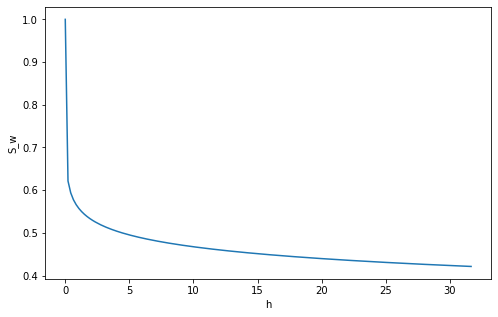

In [3]:
import math
import matplotlib.pyplot as plt

S_wr = 0.421
S_w = lambda h: -math.log( (water_density - oil_density) * h * g * (math.exp(-25 * S_wr) - math.exp(-25)) / \
                           (0.937 * 10 ** 5) + math.exp(-25) ) / 25

h0, h1 = 0, H
number_intervals = 150
step = (h1 - h0) / number_intervals

h = [h0 + i * step for i in range(number_intervals)]
s = [S_w(h_i) for h_i in h]

plt.figure(figsize=(8, 5))
plt.xlabel('h')
plt.ylabel('S_w')
plt.plot(h, s)

### Пункт 2

Капилярное давление масштабируется в зависимости от функции Леверетта следующим образом:

$ P_{cap} = \frac{\sigma cos(\Theta)}{\sqrt{\frac{k}{m}}} J(S_{w})$ (6),

где $J(S_{w})$ - функция Леверетта. Зависимость капилярного давления из условий(в начале файла) справедлива при краевом угле смачивания  $\Theta = 0$, тогда имеем:

$ \frac{\sigma}{\sqrt{\frac{k}{m}}} J(S_{w}) = \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} )}$ (7).

Теперь с учетом (7) перепишем выражение (6):

$ P_{cap} = \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} ) cos(\Theta)}{( e ^{-25 S_{wr}} - e ^ {-25} )}$ (8);

Приравняем (8) и (2):

$ \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} ) cos(\Theta)}{( e ^{-25 S_{wr}} - e ^ {-25} )} =  (\rho_{w} - \rho_{o})gH$ (9);

Снова выразим начальную водонасыщенность:

$S_{w}(h) = -\frac{1}{25} ln(\frac{(\rho_{w} - \rho_{o}) h g ( e ^{-25 S_{wr}} - e ^ {-25} )}
                                  {0.937 \cdot 10 ^ 5 \cdot cos(\Theta)} +e^{-25})$ (10);

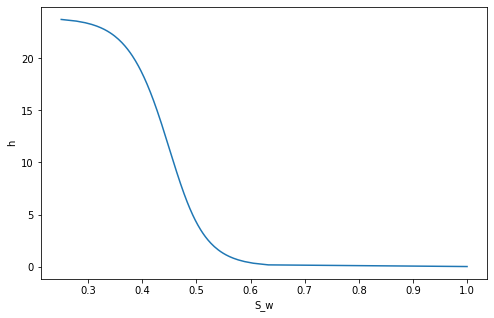

In [4]:
theta_0 = 0
# водонасыщенность перестанет изменяться после угла 90 градусов
theta_1 = 90

h0, h1 = 0, 90 * H / 120
number_intervals = 150
step = (h1 - h0) / number_intervals 

theta = lambda h: h / step * (theta_1 - theta_0) / number_intervals
S_w = lambda h: -math.log( (water_density - oil_density) * h * g * (math.exp(-25 * S_wr) - math.exp(-25)) / \
                           ( math.cos(math.radians(theta(h))) * 0.937 * 10 ** 5 ) + math.exp(-25) ) / 25

h = [h0 + i * step for i in range(number_intervals)]
s = [S_w(h_i) for h_i in h]

plt.figure(figsize=(8, 5))
plt.ylabel('h')
plt.xlabel('S_w')
plt.plot(s, h)

### Пункт 3

Проницаемость $k$ меняется по параболической зависимости. Составим уравнения этой параболы по 3 точкам: (0;5),
(H/2;50), (H;5).

Подставляя первую точку в уравнение(в общем виде) параболы, можно сразу найти коэффициент $c$:

$5 = a \cdot 0 + b \cdot 0 + c$
$\Rightarrow c = 5$.

Далее сосставим систему уравнений, используя вершину параболы:

$\begin{cases} \frac{H}{2} = -\frac{b}{2a} \\ 50 = a\frac{H^2}{4} + b\frac{H}{2} + 5\end{cases}$.

Решая данную систему, получим коэффициенты:

$a = -\frac{180}{H^2}$,
$b = \frac{180}{H}$.

Уравнение параболы в таком случае будет выглядить следующим образом:

$k(h) = -\frac{180}{H^2} \cdot h + \frac{180}{H} \cdot h + 5$ (11).

Подставим $k(0) = 5 \cdot 10^{-3} D$ в формулу
$ \frac{\sigma cos(\Theta)}{\sqrt{\frac{k}{m}}} J(S_{w}) = \frac{0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} )}$, и получим

$\sigma \cdot cos(\Theta) \cdot \sqrt{m} \cdot J(S_{w}) = \frac{\sqrt{5 \cdot 10 ^ {-3}} \cdot 0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} )}$ (12);

Учитывая (12) перепишем (6):

$P_{cap} = \frac{\sqrt{5 \cdot 10 ^ {-3}} \cdot 0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} ) \cdot \sqrt{k \cdot 10 ^ {-3}}}$(13).

Приравняем выражения (13) и (2), получим:

$ \frac{\sqrt{5 \cdot 10 ^ {-3}} \cdot 0.937 \cdot 10 ^ 5 \cdot ( e ^{-25 S_{w}} - e ^ {-25} )}{( e ^{-25 S_{wr}} - e ^ {-25} ) \cdot \sqrt{k \cdot 10 ^ {-3}}} = (\rho_{w} - \rho_{o})gH$ (14).

Из формулы (14) выразим начальную водонасыщенность:

$S_{w}(h) = -\frac{1}{25} ln(\frac{(\rho_{w} - \rho_{o}) h g ( e ^{-25 S_{wr}} - e ^ {-25} ) \cdot \sqrt{k \cdot 10 ^ {-3}}}{0.937 \cdot 10 ^ 5 \cdot \sqrt{5 \cdot 10 ^ {-3}} } +e^{-25})$.

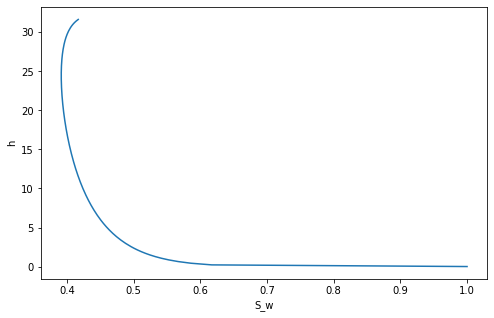

In [5]:
a, b, c = -180 / H ** 2, 180 / H, 5

k = lambda x: a * x ** 2 + b * x + c

S_w = lambda h: - 1 / 25 * math.log(
        (water_density - oil_density) * h * g * (math.exp(-25 * S_wr) - \
                                                 math.exp(-25)) * math.sqrt(k(h) * 10 ** (-3)) / \
        ( math.sqrt(5 * 10 ** (-3)) * 0.937 * 10 ** 5 ) + math.exp(-25) )

h0, h1 = 0, H
number_intervals = 150
step = (h1 - h0) / number_intervals 

h = [h0 + i * step for i in range(number_intervals)]
s = [S_w(h_i) for h_i in h]

plt.figure(figsize=(8, 5))
plt.ylabel('h')
plt.xlabel('S_w')
plt.plot(s, h)